In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import ode

\begin{equation*}

    \ddot{x} + c\dot{x} + kx=0

\end{equation*}

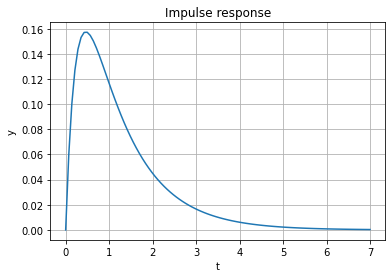

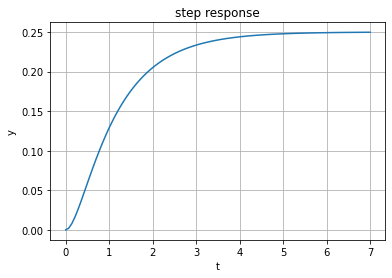

In [74]:
# c=5 ,k=4 system response to impulse and step

system = ([1.0], [1.0, 5.0, 4.0])

t, y = signal.impulse(system)
plt.plot(t, y)


plt.xlabel('t')
plt.ylabel('y')
plt.title('Impulse response')
plt.grid(True)
plt.show()

t, y = signal.step(system)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
plt.title('step response')
plt.grid(True)
plt.show()

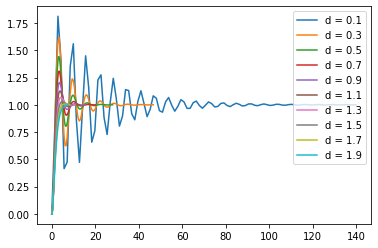

In [75]:
# changing damping ratio
k = 1

for d in np.arange(0.1, 2, 0.2):
    system = ([1.0], [1.0, d, k])
    t, y = signal.step(system)
    plt.plot(t, y, label='d = %.1f' % d)
    plt.legend()


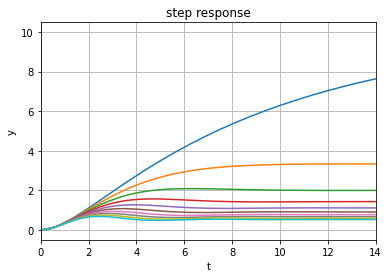

In [76]:
d = 1

for k in np.arange(0.1, 2, 0.2):
    system = ([1.0], [1.0, d, k])
    t, y = signal.step(system)
    plt.plot(t, y)
plt.xlim(0, 14)
plt.xlabel('t')
plt.ylabel('y')
plt.title('step response')
plt.grid(True)
plt.show()

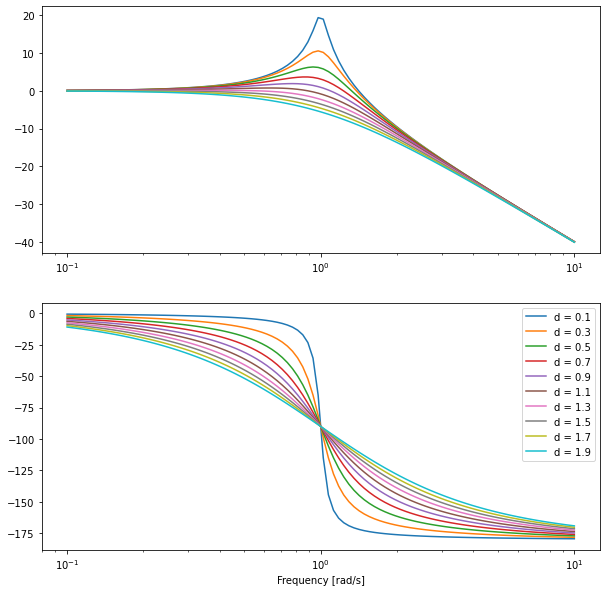

In [77]:
# constant stiffness
k = 1

fig , ax = plt.subplots(2 , 1 , figsize=(10,10))

for d in np.arange(0.1, 2, 0.2):
    system = ([1.0], [1.0, d, k])
    w, mag, phase = signal.bode(system)
    ax[0].semilogx(w, mag, label='d = %.1f' % d)
    ax[1].semilogx(w, phase, label='d = %.1f' % d)
plt.xlabel('Frequency [rad/s]')
plt.legend()
plt.show()    

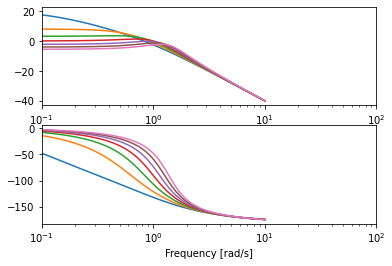

In [78]:
# Constant damping ratio
d = 1

ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex=ax1)

for k in np.arange(0.1, 2, 0.3):
    system = ([1.0], [1.0, d, k])
    w, mag, phase = signal.bode(system)
    ax1.semilogx(w, mag , label=f'k = {k}')
    ax2.semilogx(w, phase, label=f'k = {k}')
plt.xlabel('Frequency [rad/s]')
plt.xlim(0.1, 100)
plt.show()   

# bode plot using scipy

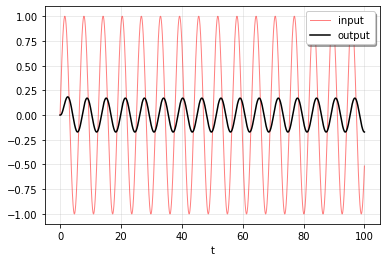

In [79]:
t = np.arange(0, 100, 0.01)
u = np.sin(t)
system = ([1.0], [1.0, 5.0, 4.0])
tout, yout, xout = signal.lsim(system, u, t)
plt.plot(t, u, 'r', alpha=0.5, linewidth=1, label='input')
plt.plot(tout, yout, 'k', linewidth=1.5, label='output')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()


# bode plot usuing iw

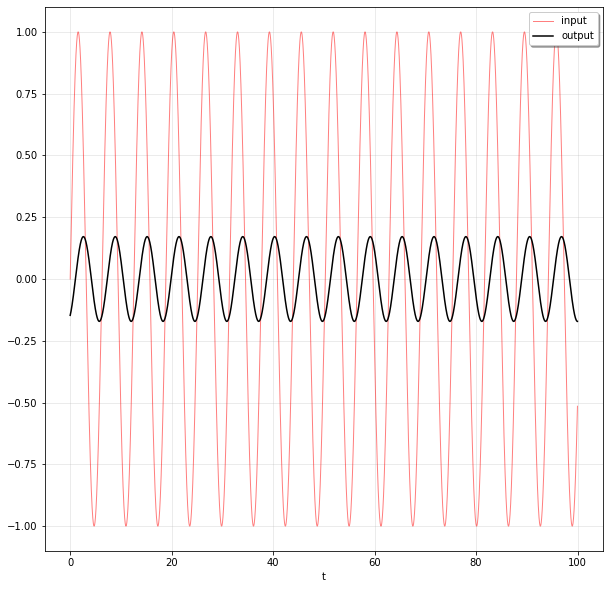

In [80]:
w = 1
s = 1j * w
Gofs = 1/(s**2 + 5* s + 4)
mag = np.abs(Gofs)
phase = np.angle(Gofs)
fig = plt.figure(figsize=(10,10))
plt.plot(t, u, 'r', alpha=0.5, linewidth=1, label='input')
plt.plot(t, mag * np.sin(t+phase), 'k', linewidth=1.5, label='output')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

# How convolution works

In [109]:
def response(system , t , u):
    
    dt = t[1] - t[0]
    T = t[-1]
    
    # 1) impulse input
    timp , yimp = signal.impulse(system, T=t)
    tsol = np.arange(0, 2*T, dt)
    xsol = 0*tsol

    fig = plt.figure(figsize=(10,10))
    ax1 = plt.subplot(311)
    ax2 = plt.subplot(312, sharex=ax1)
    ax3 = plt.subplot(313, sharex=ax1)
    # external input plot
    ax1.plot(t, u, 'r', alpha=0.5, linewidth=1, label='input')
    
    for i in range(len(t)-1):
        # 2) covolution of input and impulse response
        # or gettign the output of the system using the impulse input
        xsol[i:i+len(t)] = xsol[i:i+len(t)] + dt * u[i]*yimp

        # impulse response plot(shifting with time)
        ax2.plot(timp+t[i], yimp, 'k', linewidth=1.5, label='output')
        # convolution plot
        ax3.plot(tsol, xsol, linewidth=1.5, label='output')
        
    ax1.title.set_text('External input')
    ax2.title.set_text('Impulse response')
    ax3.title.set_text('Convolution')
    plt.xlim(0, T)
    plt.show()
    return xsol, tsol
    

In [82]:
def sin_res(t):
    return np.sin(t)

def unit_step(t):
    u  = 0*t
    u[len(t)//3:2*len(t)//3] = 1
    return u

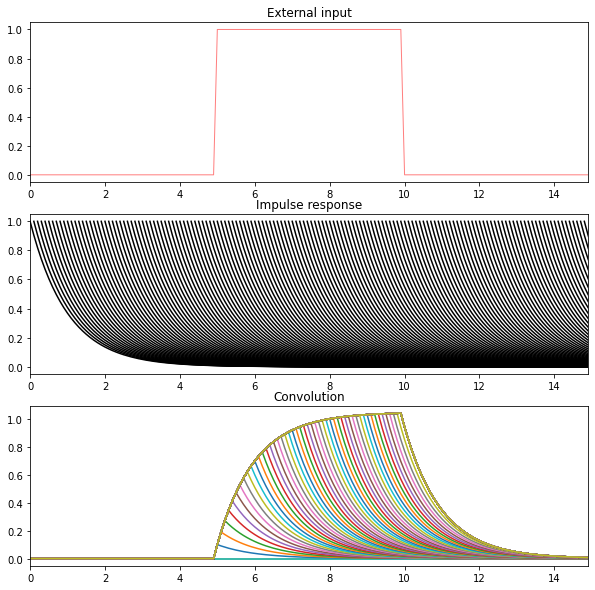

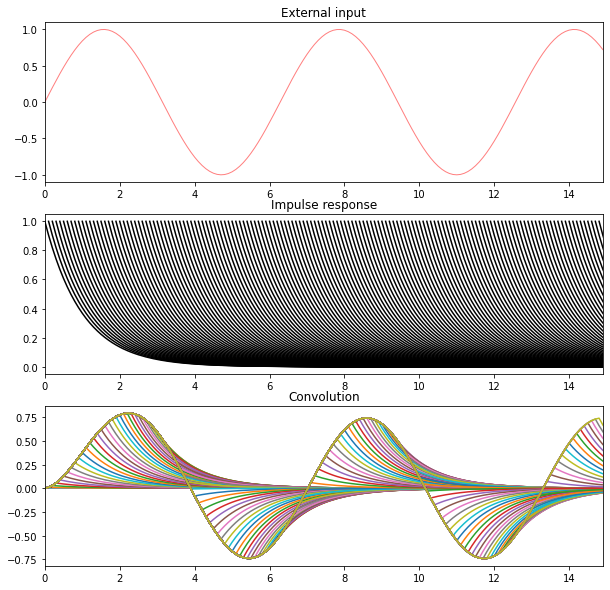

In [112]:
lam = 1
system  = ([1.0], [1.0, lam])
dt = 0.1
T = 15
t  = np.arange(0, T, dt)

_,_ = response(system, t, unit_step(t))
_,_ = response(system, t, sin_res(t))

1D PDE wave equation with FFT:


\begin{equation}
\frac{\partial u}{\partial t} = C\frac{\partial u}{\partial x}
\end{equation}

After Fourier on x:
\begin{equation}
\frac{\partial \hat{u}}{\partial t} = C*i\omega \hat{u}
\end{equation}


In [42]:
# Right hand side of the system  c=1
def fun(t, u , L):
    Nx = len(u)
    uhat = np.fft.fft(u)
    kap = np.fft.fftfreq(Nx, d=1/Nx)*2*np.pi/L
    duhat = 1j*kap*uhat
    du = np.fft.ifft(duhat)
    
    return -du

c:\Users\shahi\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_ivp\base.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(fun(t, y), dtype=dtype)


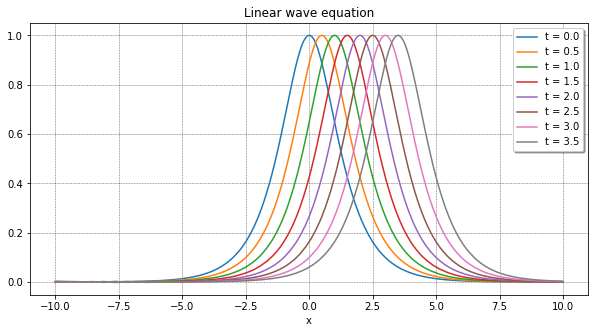

In [45]:
from scipy.integrate import solve_ivp
# defining the initial condition
dx = 0.01
L = 20
x = np.arange(-L/2, L/2, dx)
f = 0*x
# the initial condition
f = 1/np.cosh(x)

# the ODE solver
sol = solve_ivp(fun, [0, 5], f, args=(L,),dense_output=True)

fig = plt.figure(figsize=(10,5))
# plotting the solution at 0.5 seconds
for i in np.arange(0,4,0.5):
    z = sol.sol(i)
    plt.plot(x, z.T , label='t = %.1f' % i)

plt.xlabel('x')
plt.title('Linear wave equation')
plt.legend(shadow=True, framealpha=1)
plt.grid(alpha=0.6, linestyle='--', linewidth=0.5, color='black',)
plt.show()

In [2]:
# Right hand side of the system  c=1
def fun2(t, u , L):
    Nx = len(u)
    uhat = np.fft.fft(u)
    kap = np.fft.fftfreq(Nx, d=1/Nx)*2*np.pi/L
    duhat = 1j*kap*uhat
    dduhat = -1*kap**2*uhat
    du = np.fft.ifft(duhat)
    ddu = np.fft.ifft(dduhat)
    
    return -u*du+0.01*ddu

c:\Users\shahi\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_ivp\base.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(fun(t, y), dtype=dtype)


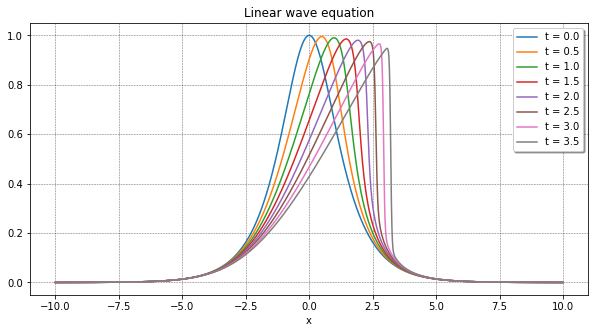

In [3]:
from scipy.integrate import solve_ivp
# defining the initial condition
dx = 0.01
L = 20
x = np.arange(-L/2, L/2, dx)
f = 0*x
# the initial condition
f = 1/np.cosh(x)

# the ODE solver
sol = solve_ivp(fun2, [0, 5], f, args=(L,),dense_output=True)

fig = plt.figure(figsize=(10,5))
# plotting the solution at 0.5 seconds
for i in np.arange(0,4,0.5):
    z = sol.sol(i)
    plt.plot(x, z.T , label='t = %.1f' % i)

plt.xlabel('x')
plt.title('Linear wave equation')
plt.legend(shadow=True, framealpha=1)
plt.grid(alpha=0.6, linestyle='--', linewidth=0.5, color='black',)
plt.show()